In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [64]:
# Loading Dataset
Alzheimer = "alzheimers_disease_data.csv"
alz = pd.read_csv(Alzheimer)

alz.head

<bound method NDFrame.head of       PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumpt

In [65]:
# Overview of Dataset
alz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [66]:
# Identifying Datatypes
alz.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [67]:
# Rewriting all of the data

# Demographics
alz['Gender'] = alz['Gender'].replace({0: 'Male', 1: 'Female'})
alz['Ethnicity'] = alz['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
alz['EducationLevel'] = alz['Ethnicity'].replace({0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'})

# Medical History
alz['FamilyHistoryAlzheimers'] = alz['FamilyHistoryAlzheimers'].replace({0: 'No', 1: 'Yes'})
alz['CardiovascularDisease'] = alz['CardiovascularDisease'].replace({0: 'No', 1: 'Yes'})
alz['Diabetes'] = alz['Diabetes'].replace({0: 'No', 1: 'Yes'})
alz['Depression'] = alz['Depression'].replace({0: 'No', 1: 'Yes'})
alz['HeadInjury'] = alz['HeadInjury'].replace({0: 'No', 1: 'Yes'})
alz['Hypertension'] = alz['Hypertension'].replace({0: 'No', 1: 'Yes'})

# Symptoms
alz['Confusion'] = alz['Confusion'].replace({0: 'No', 1: 'Yes'})
alz['Disorientation'] = alz['Disorientation'].replace({0: 'No', 1: 'Yes'})
alz['PersonalityChanges'] = alz['PersonalityChanges'].replace({0: 'No', 1: 'Yes'})
alz['DifficultyCompletingTasks'] = alz['DifficultyCompletingTasks'].replace({0: 'No', 1: 'Yes'})
alz['Forgetfulness'] = alz['Forgetfulness'].replace({0: 'No', 1: 'Yes'})

# Diagnosis
alz['Diagnosis'] = alz['Diagnosis'].replace({0: 'No', 1: 'Yes'})

alz.head

<bound method NDFrame.head of       PatientID  Age  Gender  Ethnicity EducationLevel        BMI  Smoking  \
0          4751   73    Male  Caucasian      Caucasian  22.927749        0   
1          4752   89    Male  Caucasian      Caucasian  26.827681        0   
2          4753   73    Male      Other          Other  17.795882        0   
3          4754   74  Female  Caucasian      Caucasian  33.800817        1   
4          4755   89    Male  Caucasian      Caucasian  20.716974        0   
...         ...  ...     ...        ...            ...        ...      ...   
2144       6895   61    Male  Caucasian      Caucasian  39.121757        0   
2145       6896   75    Male  Caucasian      Caucasian  17.857903        0   
2146       6897   77    Male  Caucasian      Caucasian  15.476479        0   
2147       6898   78  Female      Other          Other  15.299911        0   
2148       6899   72    Male  Caucasian      Caucasian  33.289738        0   

      AlcoholConsumption  Physica

In [68]:
# Transposing Dataset
alz_t = alz.T
alz_t.head

<bound method NDFrame.head of                                  0           1           2           3     \
PatientID                        4751        4752        4753        4754   
Age                                73          89          73          74   
Gender                           Male        Male        Male      Female   
Ethnicity                   Caucasian   Caucasian       Other   Caucasian   
EducationLevel              Caucasian   Caucasian       Other   Caucasian   
BMI                         22.927749   26.827681   17.795882   33.800817   
Smoking                             0           0           0           1   
AlcoholConsumption          13.297218    4.542524   19.555085   12.209266   
PhysicalActivity             6.327112    7.619885    7.844988    8.428001   
DietQuality                  1.347214    0.518767    1.826335    7.435604   
SleepQuality                 9.025679    7.151293    9.673574    8.392554   
FamilyHistoryAlzheimers            No         

In [69]:
# Counting Data Fields
gender_count = alz['Gender'].value_counts() 
diagnosis_count = alz['Diagnosis'].value_counts() 

print(gender_count)
print(diagnosis_count)

Gender
Female    1088
Male      1061
Name: count, dtype: int64
Diagnosis
No     1389
Yes     760
Name: count, dtype: int64


In [70]:
# Checking for NULL values
alz.isnull().sum().sum()

0

In [71]:
# Checking for duplicates
alz.duplicated().sum()

0

(1719, 35)
(430, 35)


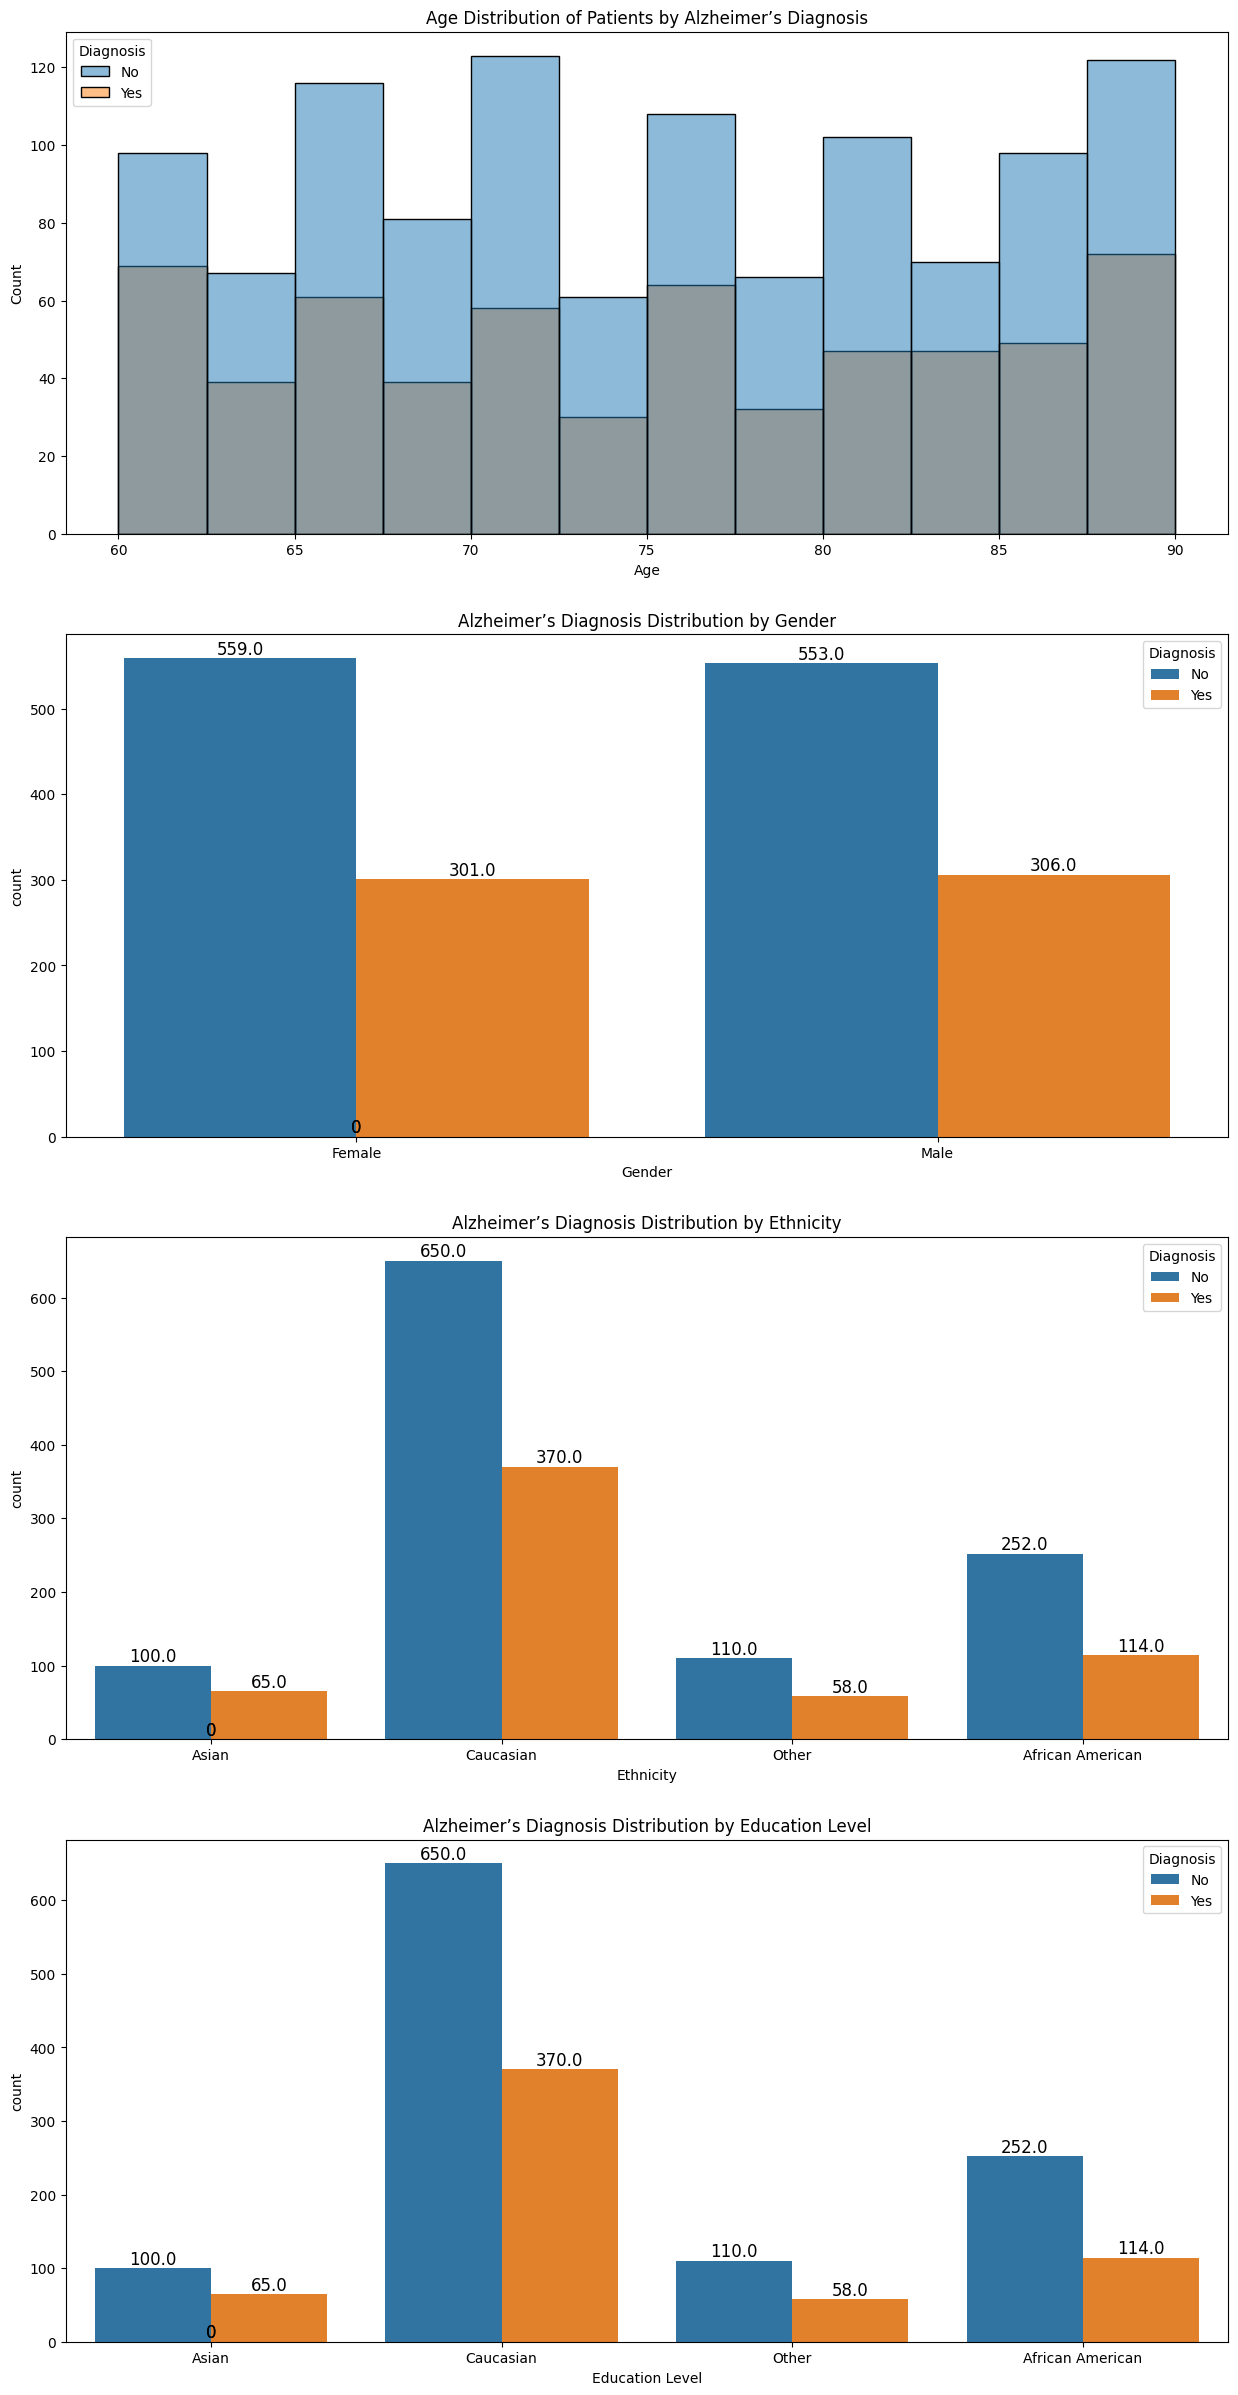

In [75]:
# Dataset Visualizations 

fig, axes = plt.subplots(4, 1, figsize = (15, 30))
plots_info = [
    (sns.histplot, "Age", "Age", "Age Distribution of Patients by Alzheimer’s Diagnosis"),
    (sns.countplot, "Gender", "Gender", "Alzheimer’s Diagnosis Distribution by Gender"),
    (sns.countplot, "Ethnicity", "Ethnicity", "Alzheimer’s Diagnosis Distribution by Ethnicity"),
    (sns.countplot, "EducationLevel", "Education Level", "Alzheimer’s Diagnosis Distribution by Education Level")
]

train_alzheimer, test_alzheimer = train_test_split(alz, test_size = 0.2, random_state = 42)
print(train_alzheimer.shape)
print(test_alzheimer.shape)

def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

for ax, (plot_func, column, xlabel, title) in zip(axes, plots_info):
    plot_func(data = train_alzheimer, x = column, hue = "Diagnosis", ax = ax)
    if plot_func == sns.countplot:
        add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

In [48]:
# Citation

'''
@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
}
'''


"\n@misc{rabie_el_kharoua_2024,\ntitle={Alzheimer's Disease Dataset},\nurl={https://www.kaggle.com/dsv/8668279},\nDOI={10.34740/KAGGLE/DSV/8668279},\npublisher={Kaggle},\nauthor={Rabie El Kharoua},\nyear={2024}\n}\n"